In [ ]:
#Nama : Muhammad Khairul Bin Nasir
#NIM : 231061005
#Prodi : Sains Data 23

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
data = pd.read_csv("/content/customer-churn.csv")

In [3]:
data.head()

,ID,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Freq. of use,Freq. of SMS,Distinct Called Numbers,Age Group,Plan,Status,Age,Customer Value,Churn
0,1,3,no,10,2,1603,25,32,11,3,pre-paid,active,30,193.120,no
1,2,8,no,37,0,4255,65,0,13,2,pre-paid,active,25,194.400,yes
2,3,0,no,38,0,0,0,0,0,2,pre-paid,not-active,25,0.000,yes
3,4,10,no,36,0,2338,54,327,20,2,pre-paid,active,25,1579.140,yes
4,5,10,no,37,0,4083,60,0,31,1,pre-paid,active,15,227.865,yes


In [4]:
data.shape

(3150, 15)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       3150 non-null   int64  
 1   Call Failure             3150 non-null   int64  
 2   Complains                3150 non-null   object 
 3   Subscription  Length     3150 non-null   int64  
 4   Charge Amount            3150 non-null   int64  
 5   Seconds of Use           3150 non-null   int64  
 6   Freq. of use             3150 non-null   int64  
 7   Freq. of SMS             3150 non-null   int64  
 8   Distinct Called Numbers  3150 non-null   int64  
 9   Age Group                3150 non-null   int64  
 10  Plan                     3150 non-null   object 
 11  Status                   3150 non-null   object 
 12  Age                      3150 non-null   int64  
 13  Customer Value           3150 non-null   float64
 14  Churn                   

In [7]:
data.describe()

,ID,Call Failure,Subscription Length,Charge Amount,Seconds of Use,Freq. of use,Freq. of SMS,Distinct Called Numbers,Age Group,Age,Customer Value
count,3150.000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,1575.500,7.627937,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,2.826032,30.998413,470.972916
std,909.471,7.263886,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,0.892555,8.831095,517.015433
min,1.000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15.000000,0.000000
25%,788.250,1.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,2.000000,25.000000,113.801250
50%,1575.500,6.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,3.000000,30.000000,228.480000
75%,2362.750,12.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,3.000000,30.000000,788.388750
max,3150.000,36.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000,55.000000,2165.280000


In [6]:
data.isnull().sum()

,0
ID,0
Call Failure,0
Complains,0
Subscription Length,0
Charge Amount,0
Seconds of Use,0
Freq. of use,0
Freq. of SMS,0
Distinct Called Numbers,0
Age Group,0


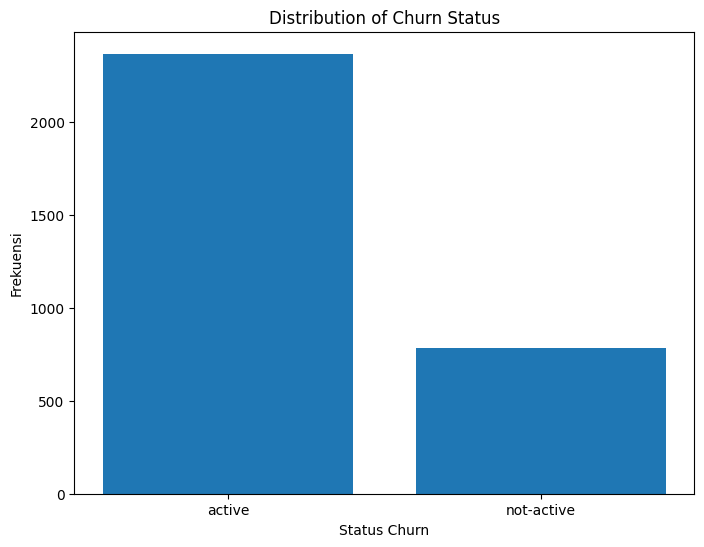

In [9]:
status_churn_counts = data['Status'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(status_churn_counts.index, status_churn_counts.values)
plt.xlabel('Status Churn')
plt.ylabel('Frekuensi')
plt.title('Distribution of Churn Status')
plt.show()

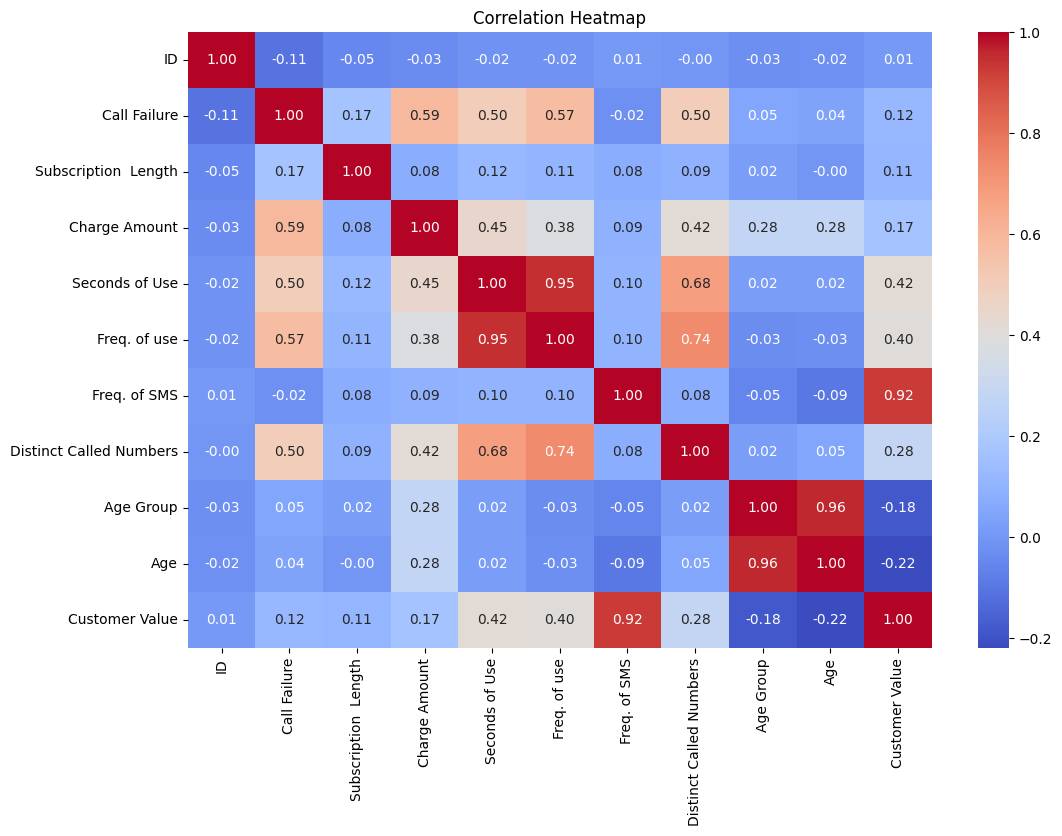

In [15]:
numeric_data = data.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [31]:
data = pd.read_csv('customer-churn.csv')

X = data.drop('Churn', axis=1)
y = data['Churn']
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [33]:
y_pred = model.predict(X_test)

In [34]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

accuracy, conf_matrix, class_report

(0.9396825396825397,
 array([[ 77,  26],
        [ 12, 515]]),
 '              precision    recall  f1-score   support\n\n          no       0.87      0.75      0.80       103\n         yes       0.95      0.98      0.96       527\n\n    accuracy                           0.94       630\n   macro avg       0.91      0.86      0.88       630\nweighted avg       0.94      0.94      0.94       630\n')

In [53]:
import statsmodels.api as sm

data = pd.read_csv('customer-churn.csv')

X = data['Age']
y = data['Customer Value']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Customer Value   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     160.7
Date:                Mon, 21 Oct 2024   Prob (F-statistic):           6.02e-36
Time:                        01:09:04   Log-Likelihood:                -24072.
No. Observations:                3150   AIC:                         4.815e+04
Df Residuals:                    3148   BIC:                         4.816e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        870.8850     32.805     26.547      0.0

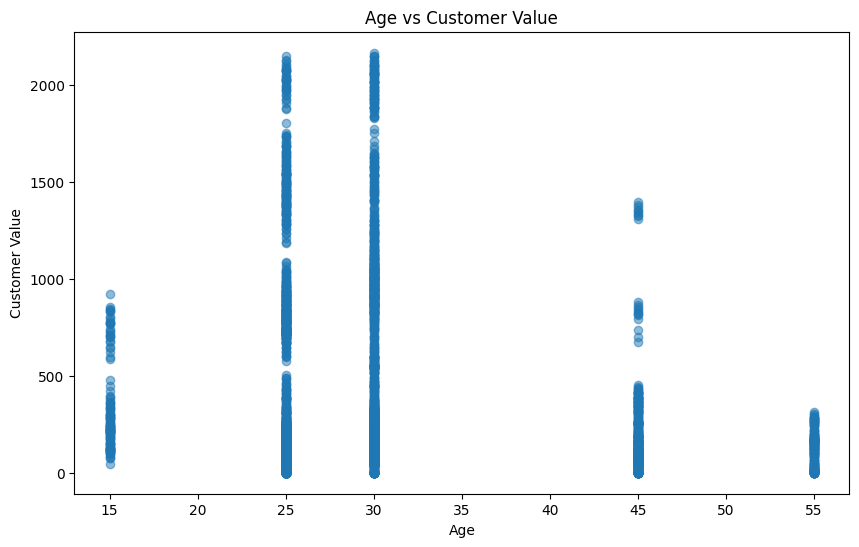

In [56]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Age'], data['Customer Value'], alpha=0.5)
plt.title('Age vs Customer Value')
plt.xlabel('Age')
plt.ylabel('Customer Value')
plt.show()

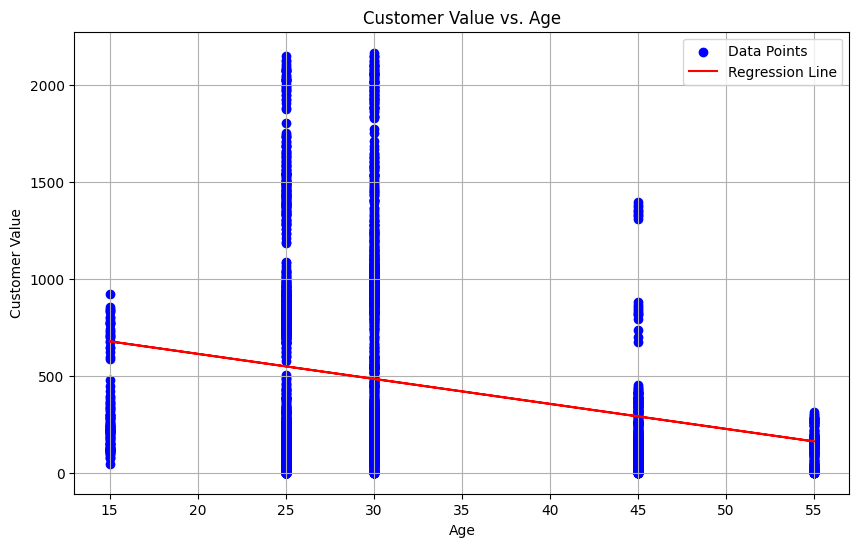

In [57]:
data = pd.read_csv('customer-churn.csv')

X = data['Age']
y = data['Customer Value']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

predictions = model.predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(data['Age'], y, color='blue', label='Data Points')
plt.plot(data['Age'], predictions, color='red', label='Regression Line')
plt.title('Customer Value vs. Age')
plt.xlabel('Age')
plt.ylabel('Customer Value')
plt.legend()
plt.grid()
plt.show()